## **CRISP-DM: Cross-Industry Standard Process for Data Mining**

# **Predicting Whether a Patient has Heart Disease Based on Various Clinical Parameters**.

# **1. Business Understanding**

Before diving into the data, it's vital to understand the problem at hand. Given the dataset, our primary objective is to predict whether a patient has heart disease based on various clinical parameters.

# **Questions to Address:**
1. What are the most significant factors that contribute to heart disease?
2. Can we accurately predict the presence of heart disease in a patient using the provided parameters?
3. \\\\How can the predictions be used in a real-world clinical setting?





# **2. Data Understanding and Exploratory Data Analysis (EDA)**

We'll start by loading the dataset and performing an exploratory data analysis (EDA) to understand its structure, the type of data, and any potential issues.

Let's load the dataset and take an initial look at its first few rows.

In [2]:
from google.colab import files
da = files.upload()

Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


In [3]:
import pandas as pd


heart_data = pd.read_csv('heart_cleveland_upload.csv')
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


**age**: Age in years.
**sex**: Gender (1 = male, 0 = female).
**cp**: Chest pain type (0-3).
**trestbps**: Resting blood pressure (in mm Hg).
**chol**: Cholesterol measurement in mg/dl.
**fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
**restecg**: Resting electrocardiographic measurement (0-2).
**thalach:** Maximum heart rate achieved.
**exang:** Exercise induced angina (1 = yes, 0 = no).
**oldpeak**: ST depression induced by exercise relative to rest.
**slope**: Slope of the peak exercise ST segment.
**ca**: Number of major vessels colored by fluoroscopy (0-3).
**thal**: A blood disorder called thalassemia (0-3).
**condition**: Presence of heart disease (1 = yes, 0 = no).

**2a. Checking for missing values**

In [4]:

missing_values = heart_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


**There are no missing values in the dataset, which makes data preparation step easier**.

# **Statistical Summary:**

In [5]:
# Age
age_min = heart_data['age'].min()
age_max = heart_data['age'].max()
age_avg = heart_data['age'].mean()

# Sex (Percentage of males)
sex_percentage = (heart_data[heart_data['sex'] == 1].shape[0] / heart_data.shape[0]) * 100

# Chest Pain (cp)
cp_min = heart_data['cp'].min()
cp_max = heart_data['cp'].max()
cp_avg = heart_data['cp'].mean()

# Resting Blood Pressure (trestbps)
trestbps_min = heart_data['trestbps'].min()
trestbps_max = heart_data['trestbps'].max()
trestbps_avg = heart_data['trestbps'].mean()

# Cholesterol (chol)
chol_min = heart_data['chol'].min()
chol_max = heart_data['chol'].max()
chol_avg = heart_data['chol'].mean()

# Fasting Blood Sugar (fbs)
fbs_percentage = (heart_data[heart_data['fbs'] == 1].shape[0] / heart_data.shape[0]) * 100

# Resting Electrocardiographic Measurement (restecg)
restecg_min = heart_data['restecg'].min()
restecg_max = heart_data['restecg'].max()
restecg_avg = heart_data['restecg'].mean()

# Maximum Heart Rate Achieved (thalach)
thalach_min = heart_data['thalach'].min()
thalach_max = heart_data['thalach'].max()
thalach_avg = heart_data['thalach'].mean()

# Oldpeak
oldpeak_min = heart_data['oldpeak'].min()
oldpeak_max = heart_data['oldpeak'].max()
oldpeak_avg = heart_data['oldpeak'].mean()

# Slope
slope_min = heart_data['slope'].min()
slope_max = heart_data['slope'].max()
slope_avg = heart_data['slope'].mean()

# Number of Major Vessels (ca)
ca_min = heart_data['ca'].min()
ca_max = heart_data['ca'].max()
ca_avg = heart_data['ca'].mean()

# Thalassemia (thal)
thal_min = heart_data['thal'].min()
thal_max = heart_data['thal'].max()
thal_avg = heart_data['thal'].mean()

# Exercise Induced Angina (exang)
exang_percentage = (heart_data[heart_data['exang'] == 1].shape[0] / heart_data.shape[0]) * 100

# Condition (Presence of heart disease)
condition_percentage = (heart_data[heart_data['condition'] == 1].shape[0] / heart_data.shape[0]) * 100

# Print the results
print(f"Age: Min: {age_min}, Max: {age_max}, Average: {age_avg:.2f}")
print(f"Percentage of Males: {sex_percentage:.2f}%")
print(f"Chest Pain (cp): Min: {cp_min}, Max: {cp_max}, Average: {cp_avg:.2f}")
print(f"Resting Blood Pressure (trestbps): Min: {trestbps_min}, Max: {trestbps_max}, Average: {trestbps_avg:.2f}")
print(f"Cholesterol (chol): Min: {chol_min}, Max: {chol_max}, Average: {chol_avg:.2f}")
print(f"Percentage with Fasting Blood Sugar > 120 mg/dl: {fbs_percentage:.2f}%")
print(f"Resting Electrocardiographic Measurement (restecg): Min: {restecg_min}, Max: {restecg_max}, Average: {restecg_avg:.2f}")
print(f"Maximum Heart Rate Achieved (thalach): Min: {thalach_min}, Max: {thalach_max}, Average: {thalach_avg:.2f}")
print(f"Oldpeak: Min: {oldpeak_min}, Max: {oldpeak_max}, Average: {oldpeak_avg:.2f}")
print(f"Slope: Min: {slope_min}, Max: {slope_max}, Average: {slope_avg:.2f}")
print(f"Number of Major Vessels (ca): Min: {ca_min}, Max: {ca_max}, Average: {ca_avg:.2f}")
print(f"Thalassemia (thal): Min: {thal_min}, Max: {thal_max}, Average: {thal_avg:.2f}")
print(f"Percentage with Exercise Induced Angina: {exang_percentage:.2f}%")
print(f"Percentage with Heart Disease: {condition_percentage:.2f}%")


Age: Min: 29, Max: 77, Average: 54.54
Percentage of Males: 67.68%
Chest Pain (cp): Min: 0, Max: 3, Average: 2.16
Resting Blood Pressure (trestbps): Min: 94, Max: 200, Average: 131.69
Cholesterol (chol): Min: 126, Max: 564, Average: 247.35
Percentage with Fasting Blood Sugar > 120 mg/dl: 14.48%
Resting Electrocardiographic Measurement (restecg): Min: 0, Max: 2, Average: 1.00
Maximum Heart Rate Achieved (thalach): Min: 71, Max: 202, Average: 149.60
Oldpeak: Min: 0.0, Max: 6.2, Average: 1.06
Slope: Min: 0, Max: 2, Average: 0.60
Number of Major Vessels (ca): Min: 0, Max: 3, Average: 0.68
Thalassemia (thal): Min: 0, Max: 2, Average: 0.84
Percentage with Exercise Induced Angina: 32.66%
Percentage with Heart Disease: 46.13%


**Age:** Min: 29, Max: 77, Average: 54.54
**Percentage of Males:** 67.68%
**Chest Pain (cp)**: Min: 0, Max: 3, Average: 2.16
**Resting Blood Pressure (trestbps)**: Min: 94, Max: 200, Average: 131.69
**Cholesterol (chol): Min:** 126, Max: 564, Average: 247.35
**Percentage with Fasting Blood Sugar > 120 mg/dl: **14.48%
**Resting Electrocardiographic Measurement (restecg)**: Min: 0, Max: 2, Average: 1.00
**Maximum Heart Rate Achieved (thalach):** Min: 71, Max: 202, Average: 149.60
**Oldpeak:** Min: 0.0, Max: 6.2, Average: 1.06
**Slope:** Min: 0, Max: 2, Average: 0.60
**Number of Major Vessels (ca):** Min: 0, Max: 3, Average: 0.68
**Thalassemia (thal):** Min: 0, Max: 2, Average: 0.84
**Percentage with Exercise Induced Angina:** 32.66%
**Percentage with Heart Disease:** 46.13%

# **Visualizations**

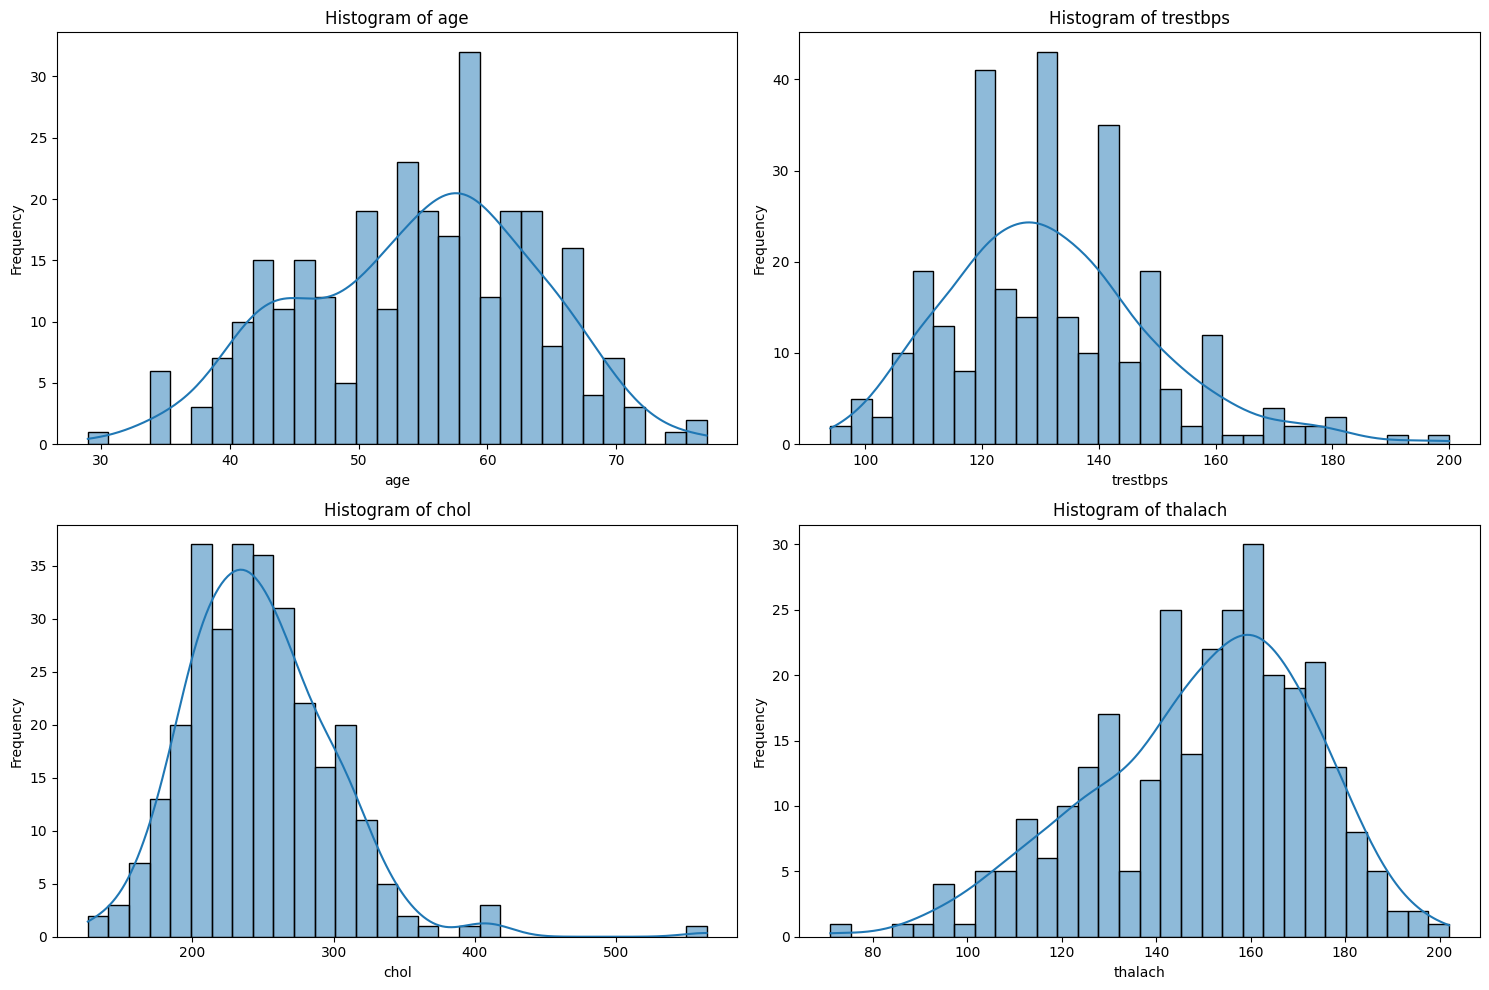

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns


# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Features for which histograms will be generated
features = ['age', 'trestbps', 'chol', 'thalach']

# Plot histograms for the selected features
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(heart_data[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Here are the histograms for the continuous variables:**

**Interpretation**

**Age:** The distribution is slightly left-skewed, indicating a larger number of patients in the higher age groups.
**Resting Blood Pressure (trestbps):** The distribution is right-skewed, with a majority of patients having blood pressure values around the 120-140 mm Hg range.
**Cholesterol (chol):** The distribution is right-skewed, with a majority of patients having cholesterol levels around 200-250 mg/dl.
**Maximum Heart Rate Achieved (thalach)**: The distribution is left-skewed, indicating that a majority of patients have higher maximum heart rates.


**Bar plots for the categorical variables:**

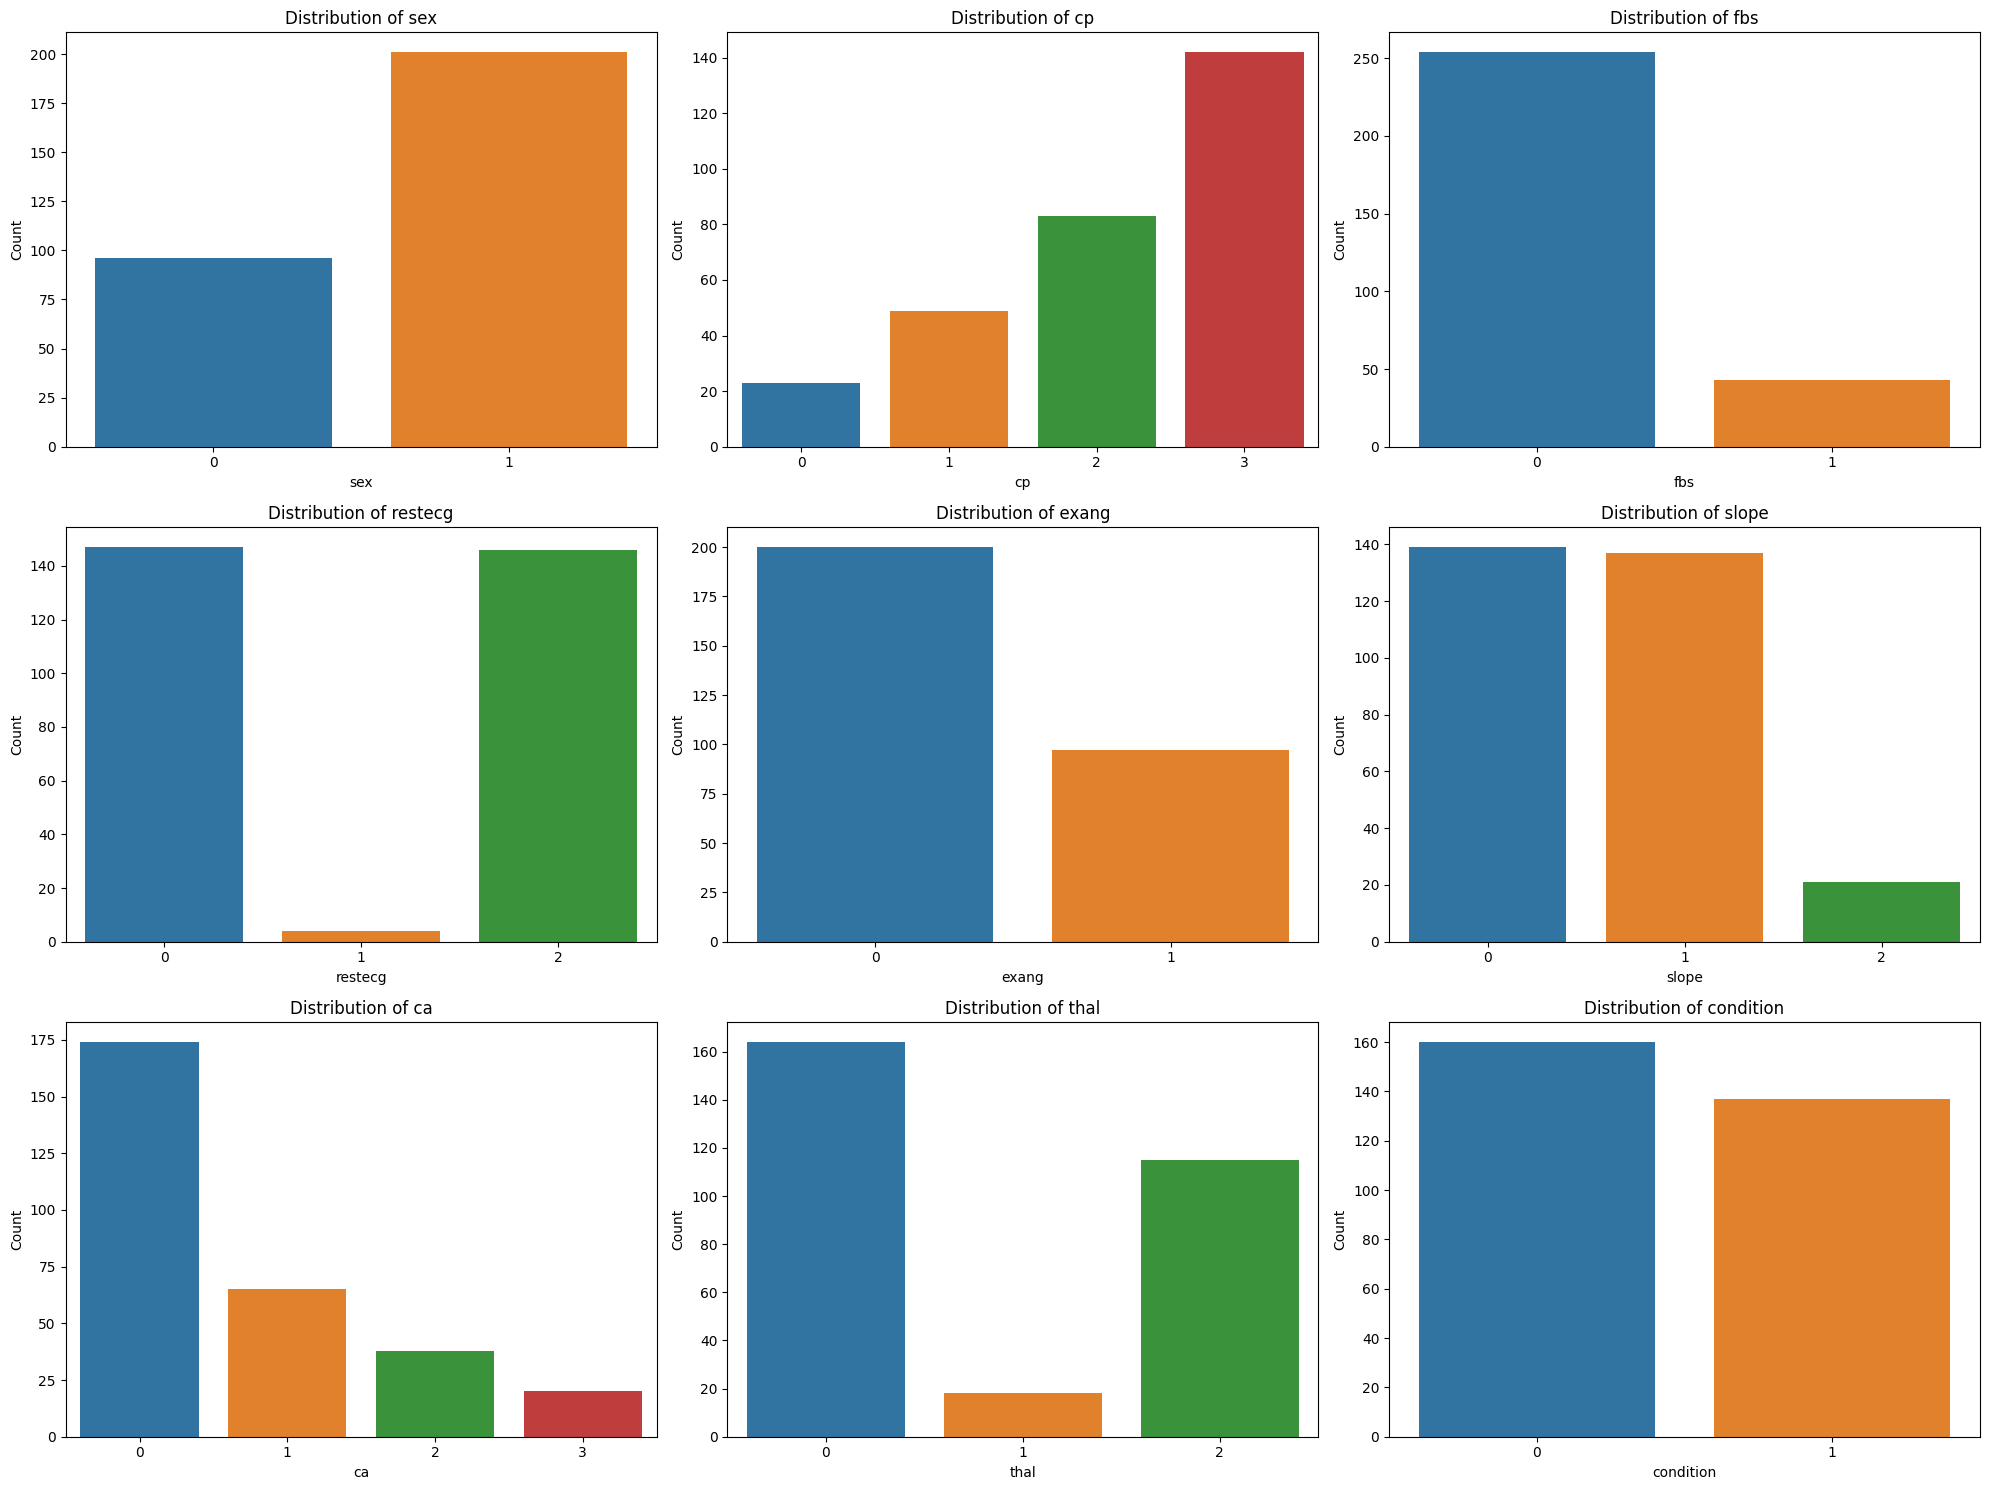

In [6]:


import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Categorical features for which bar plots will be generated
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']

# Plot bar plots for the selected features
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=heart_data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Interpretation for bar plots for the categorical variables:**

Sex: We can observe that there are more males (represented as 1) than females (represented as 0) in the dataset.
Chest Pain Type (cp): The majority of patients have type 0 chest pain, followed by type 2.
Fasting Blood Sugar (fbs): Most patients have a fasting blood sugar less than 120 mg/dl (represented as 0).
Resting Electrocardiographic Measurement (restecg): The majority of patients fall under category 0 and 1, with very few in category 2.
Exercise Induced Angina (exang): Most patients don't experience exercise-induced angina (represented as 0).
Slope: The majority of patients have a slope of 1 or 2.
Number of Major Vessels (ca): Most patients have 0 major vessels colored by fluoroscopy.
Thalassemia (thal): The thalassemia types are primarily split between types 1 and 2.
Condition: A little more than half of the patients don't have heart disease (represented as 0), while the rest do (represented as 1).

**Correlation HeatMap**

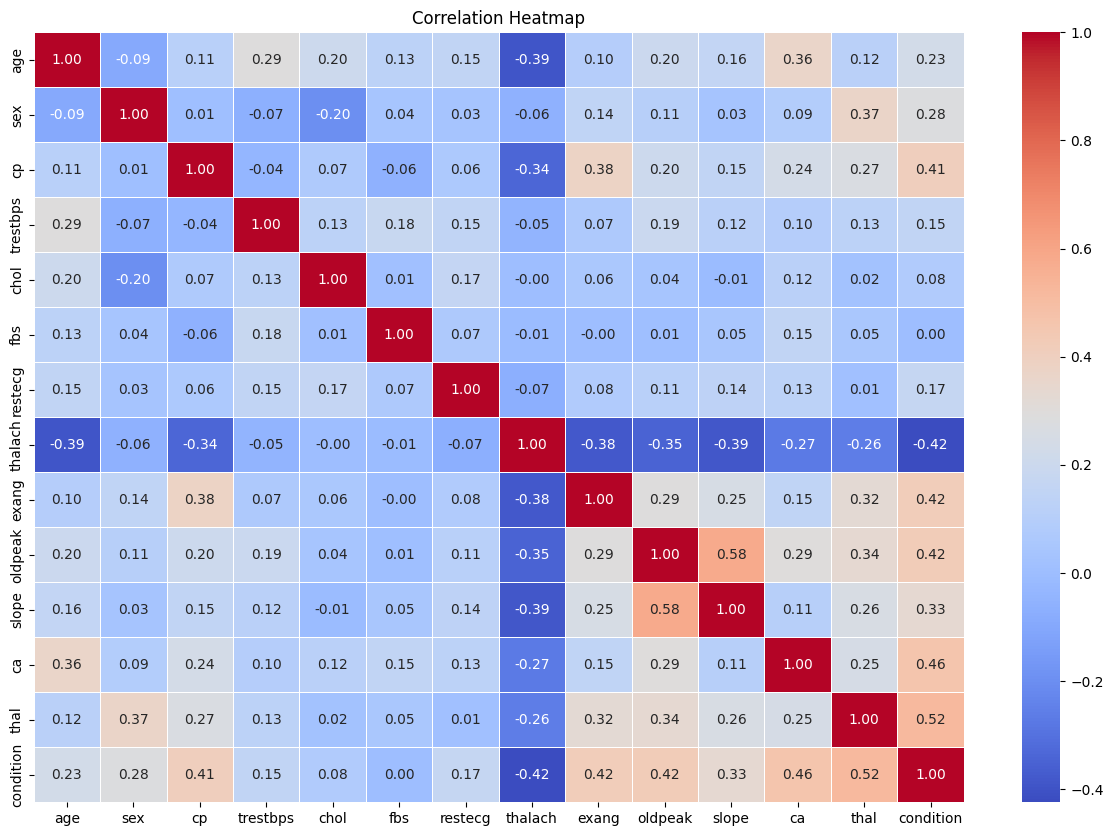

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns



# Calculate correlations
correlation_matrix = heart_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()


**Correlation Heatmap observasion:**

Target Variable (Condition) Correlations:

cp (Chest Pain Type): There's a positive correlation, indicating that certain types of chest pain are associated with a higher likelihood of heart disease.
thalach (Maximum Heart Rate Achieved): A positive correlation suggests that patients with higher maximum heart rates are more likely to have heart disease.
slope (Slope of the Peak Exercise ST Segment): There's a positive correlation, suggesting a certain slope type is more commonly associated with heart disease.
exang (Exercise Induced Angina): A negative correlation indicates that those who experience angina due to exercise are less likely to have heart disease.
oldpeak (ST depression induced by exercise relative to rest): A negative correlation with the condition suggests that a higher oldpeak value might be associated with a lower likelihood of heart disease.
ca (Number of Major Vessels colored by fluoroscopy): There's a negative correlation, indicating that having more major vessels colored might be associated with a lower likelihood of heart disease.
thal (Thalassemia): A negative correlation suggests a certain thalassemia type is less likely to be associated with heart disease.
Inter-feature Correlations:

oldpeak and slope are negatively correlated, indicating that as one increases, the other tends to decrease.
exang (Exercise Induced Angina) and thalach (Maximum Heart Rate Achieved) are negatively correlated. This suggests that patients who experience exercise-induced angina might have a lower maximum heart rate.
age and thalach are negatively correlated, indicating that older patients tend to have lower maximum heart rates.

**Boxplots**

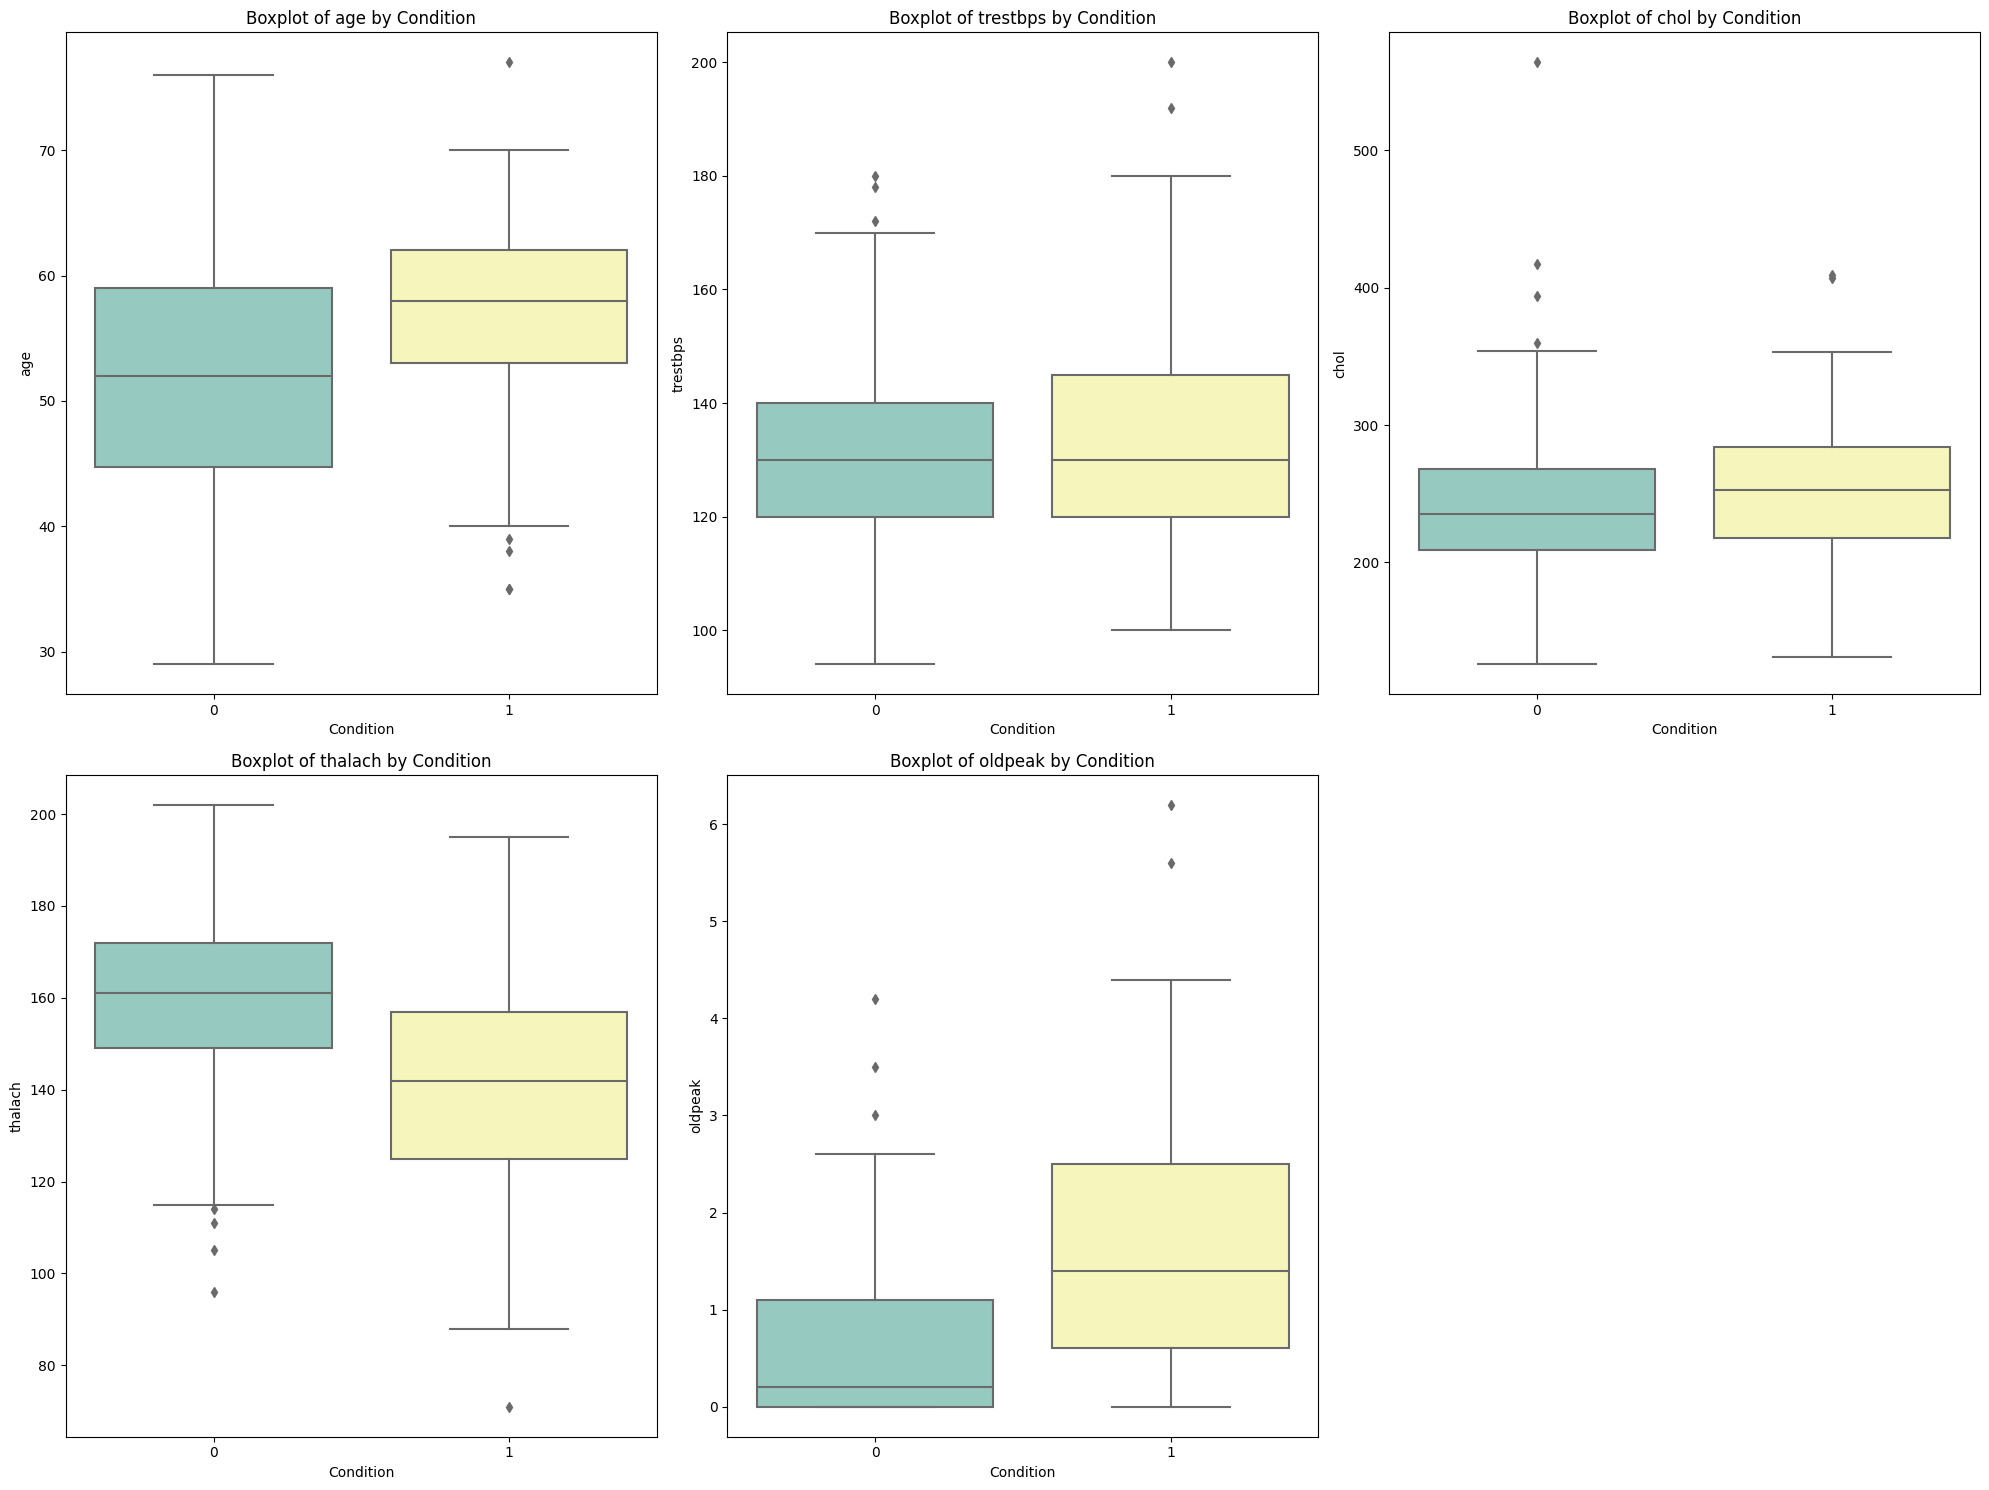

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Continuous features for which boxplots will be generated
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Generate boxplots for the selected features
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_data, x='condition', y=feature, palette="Set3")
    plt.title(f'Boxplot of {feature} by Condition')
    plt.xlabel('Condition')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


**Boxplots observation**

Age: Patients with heart disease (condition = 1) seem to have a slightly higher median age compared to those without heart disease.
Resting Blood Pressure (trestbps): The medians for resting blood pressure are somewhat similar between the two groups, though there are some outliers, especially in the non-heart disease group.
Cholesterol (chol): The cholesterol levels seem to have a similar median for both groups. There are some outliers in the heart disease group.
Maximum Heart Rate Achieved (thalach): Patients with heart disease tend to have a lower median maximum heart rate compared to those without heart disease.
Oldpeak: Patients with heart disease have a slightly higher median oldpeak value compared to those without heart disease.

**Pairplots**

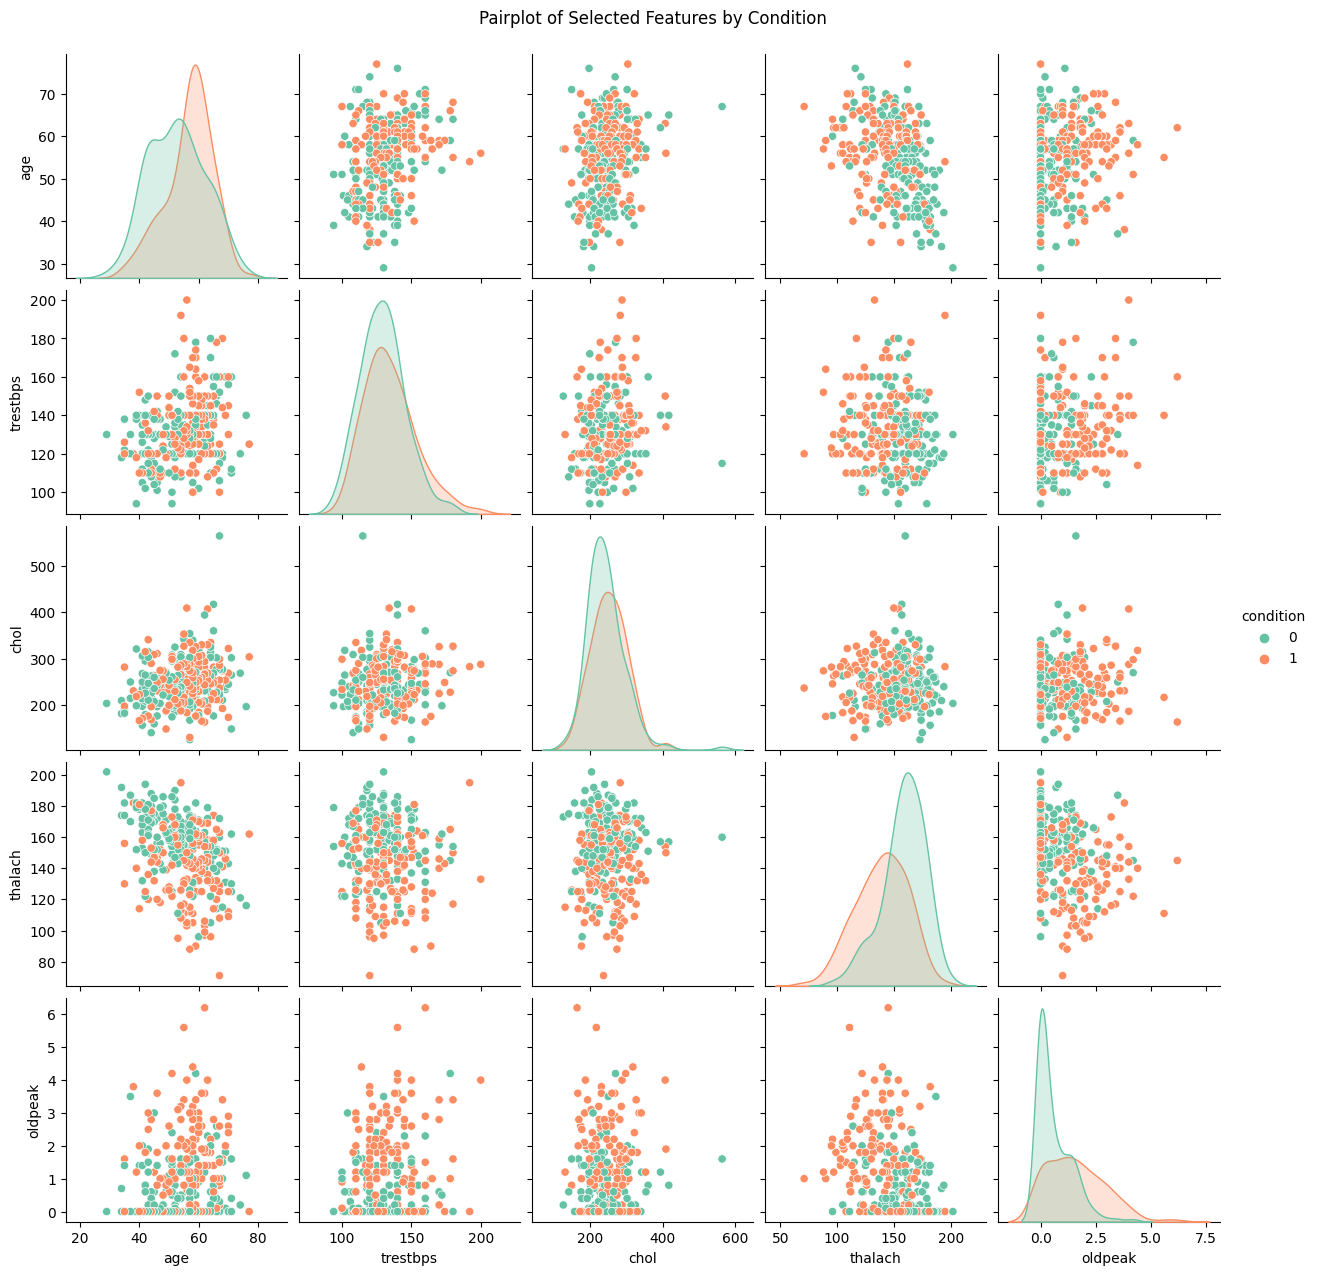

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt


# Generate the pairplot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition']
sns.pairplot(heart_data[selected_features], hue='condition', palette="Set2", diag_kind="kde")

plt.suptitle('Pairplot of Selected Features by Condition', y=1.02)
plt.show()


**Pairplots observations**

Age vs. trestbps: There seems to be a mild positive correlation between age and resting blood pressure, indicating that as age increases, resting blood pressure might also tend to increase.
Age vs. chol: There's a spread of cholesterol levels across different age groups, with some older patients having high cholesterol levels.
Age vs. thalach: There's a negative correlation between age and maximum heart rate achieved, suggesting that older individuals tend to have lower maximum heart rates.
Age vs. oldpeak: There's no clear pattern between age and oldpeak, though some older individuals have higher oldpeak values.
trestbps vs. chol: No clear pattern between resting blood pressure and cholesterol.
trestbps vs. thalach: No clear pattern between resting blood pressure and maximum heart rate achieved.
trestbps vs. oldpeak: No clear pattern between resting blood pressure and oldpeak.
chol vs. thalach: No clear pattern between cholesterol and maximum heart rate achieved.
chol vs. oldpeak: No clear pattern between cholesterol and oldpeak.
thalach vs. oldpeak: A noticeable negative correlation, suggesting that individuals with higher maximum heart rates tend to have lower oldpeak values.

**Violin Plots**

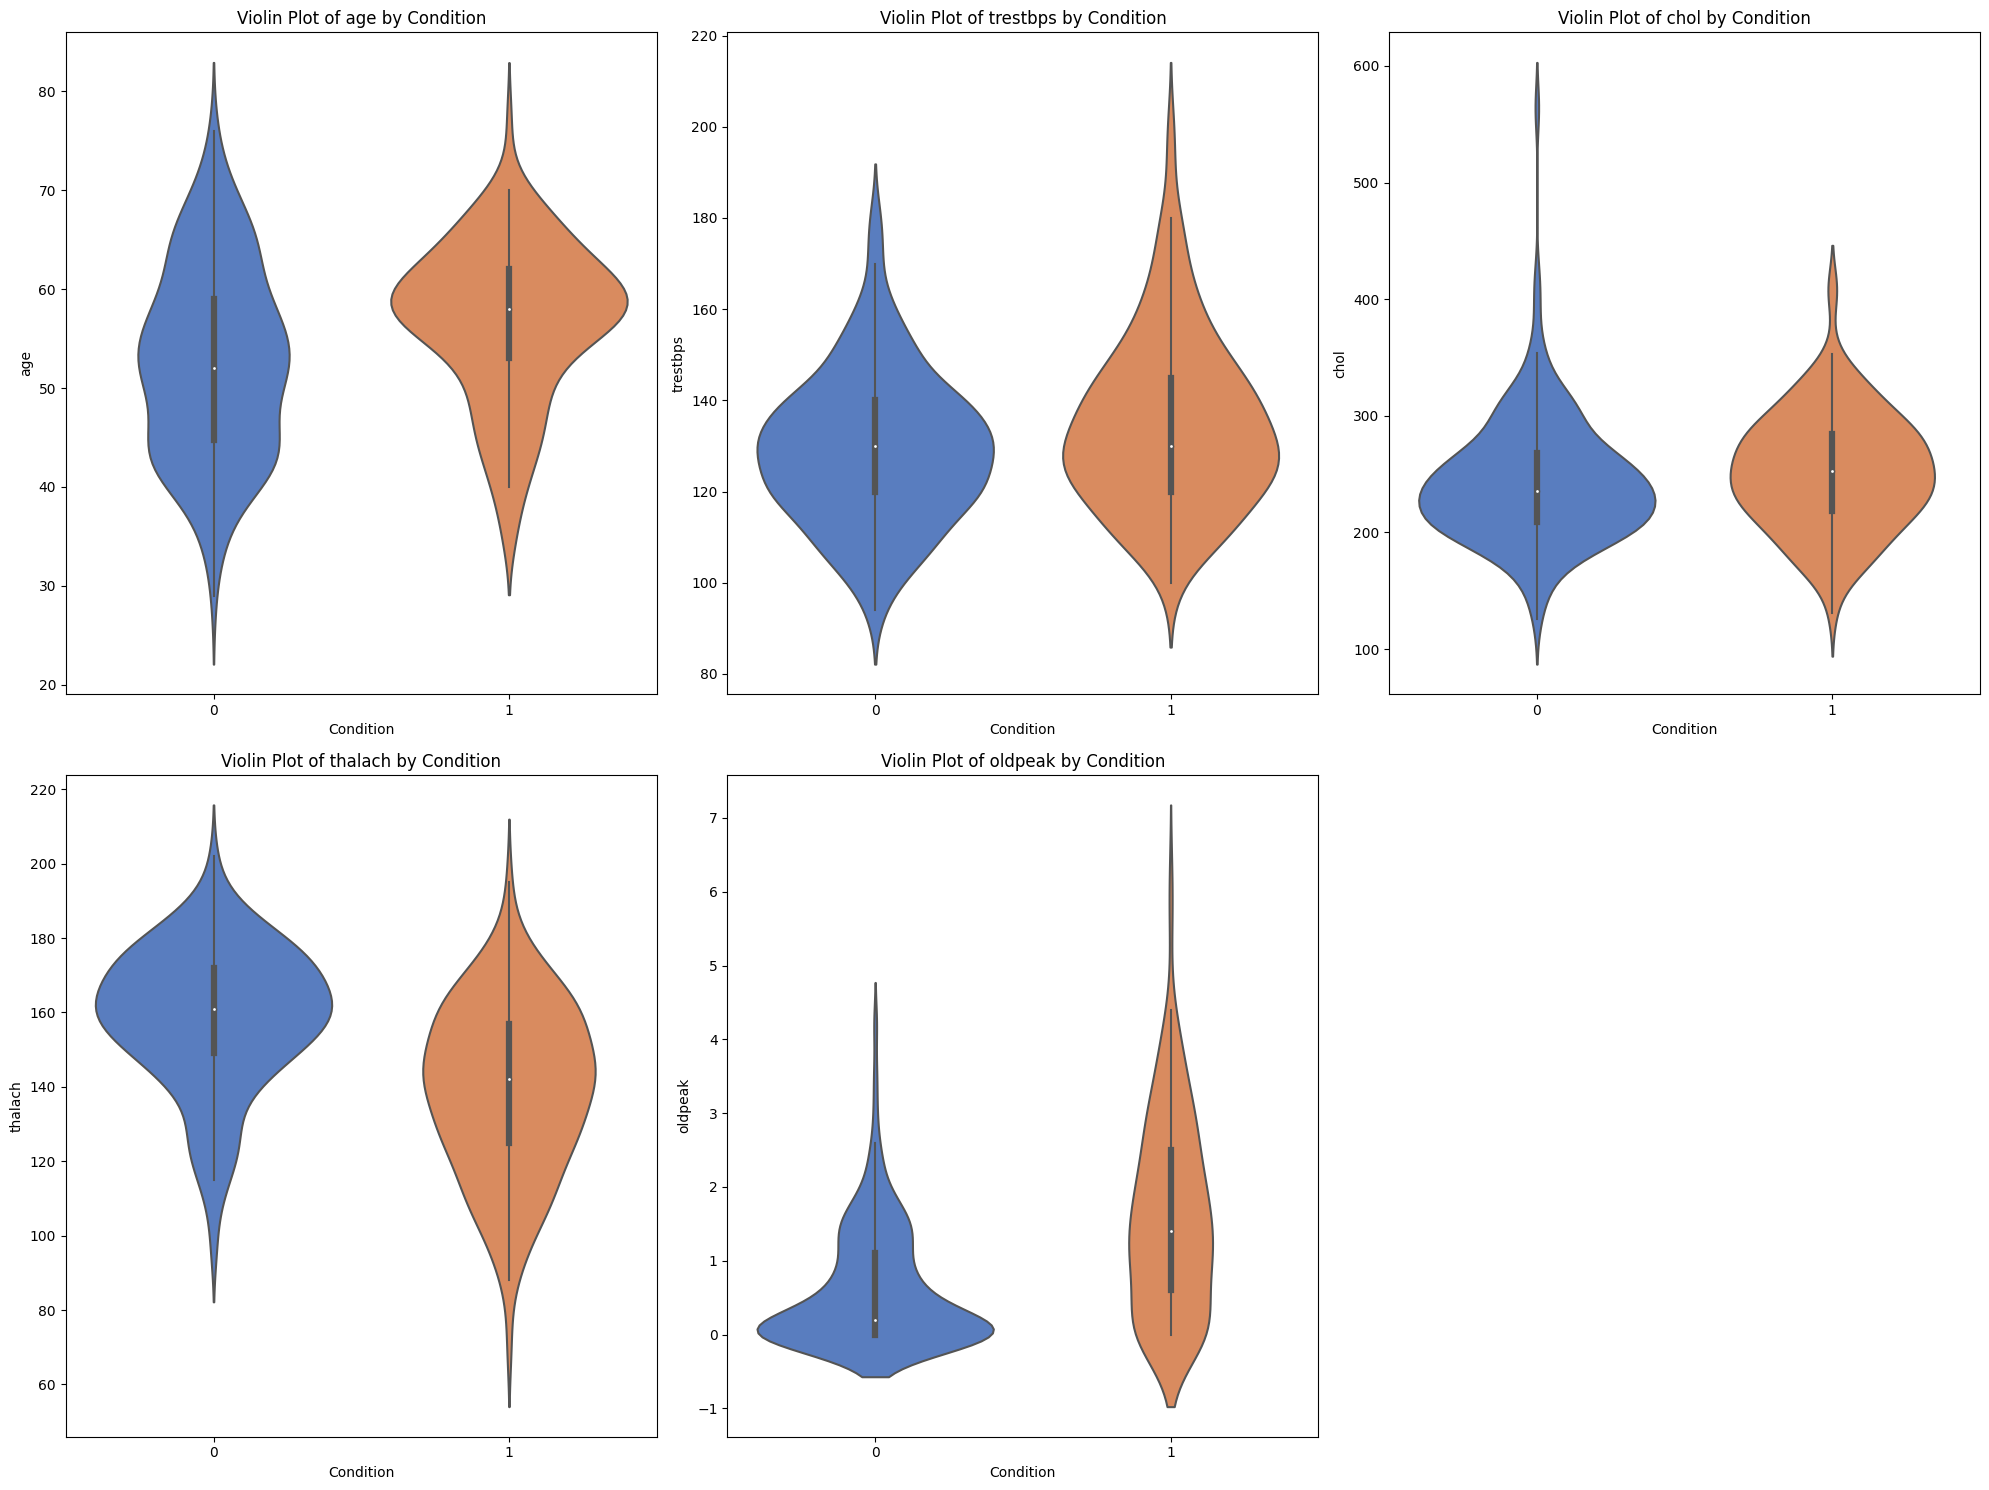

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure for Violin Plots
plt.figure(figsize=(20, 15))

# Features for violin plots
continuous_features_violin = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Generate violin plots
for i, feature in enumerate(continuous_features_violin, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=heart_data, x='condition', y=feature, palette="muted")
    plt.title(f'Violin Plot of {feature} by Condition')
    plt.xlabel('Condition')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


**Violin Plots Observations:**

Age: The age distribution for patients with and without heart disease seems somewhat similar. However, patients with heart disease appear to have a slightly higher median age compared to those without heart disease.
Resting Blood Pressure (trestbps): The distributions are similar for both groups, but the heart disease group appears to have a slightly broader distribution, indicating a higher variance in resting blood pressure among these patients.
Cholesterol (chol): Both groups have similar cholesterol distributions. The heart disease group has some pronounced peaks, indicating certain cholesterol levels that are more prevalent.
Maximum Heart Rate Achieved (thalach): Patients with heart disease tend to have a lower median maximum heart rate compared to those without heart disease.
Oldpeak: The distribution for patients without heart disease is more concentrated around lower oldpeak values. In contrast, the distribution for patients with heart disease is broader, with a higher median oldpeak value.

**Pie Charts**

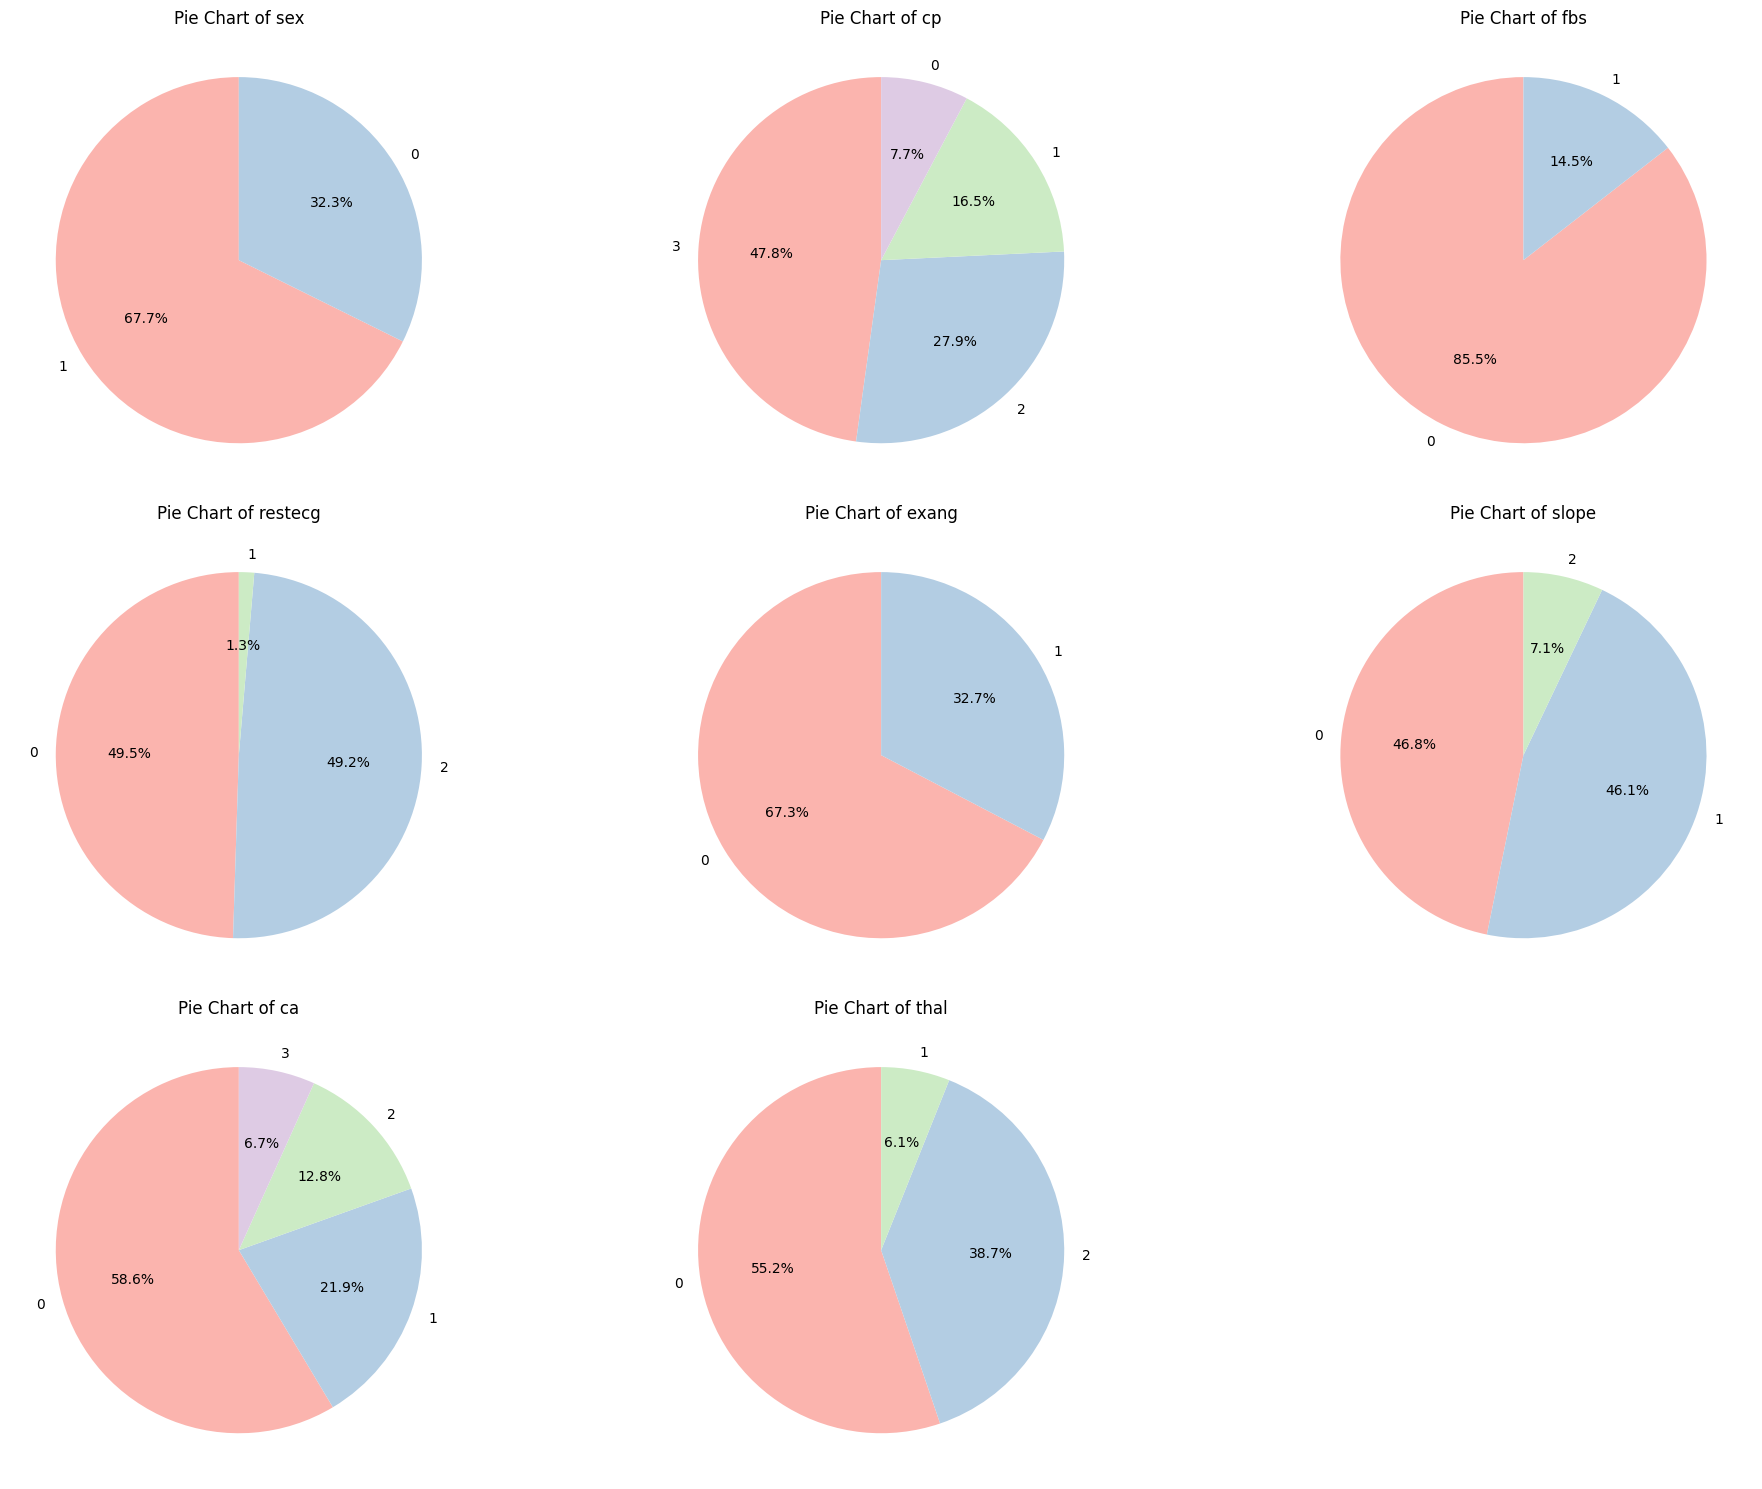

In [11]:
plt.figure(figsize=(20, 15))

# Categorical features for pie charts
categorical_features_pie = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Generate pie charts
for i, feature in enumerate(categorical_features_pie, 1):
    plt.subplot(3, 3, i)
    heart_data[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Pastel1", n_colors=heart_data[feature].nunique()))
    plt.title(f'Pie Chart of {feature}')
    plt.ylabel('')

plt.tight_layout()
plt.show()


**Pie Charts oservations**

Pie Charts Observations:
Sex: A significant majority of the dataset represents males.
Chest Pain Type (cp): The most common type of chest pain is type 0, followed by type 2, 1, and 3.
Fasting Blood Sugar (fbs): The vast majority of patients have a fasting blood sugar less than 120 mg/dl.
Resting Electrocardiographic Measurement (restecg): The most common value is 1, followed closely by 0, with very few occurrences of 2.
Exercise Induced Angina (exang): Most patients do not experience exercise-induced angina.
Slope: The slope value of 2 is the most common, followed by 1 and then 0.
Number of Major Vessels (ca): Most patients have 0 major vessels, followed by 1, 2, and 3.
Thalassemia (thal): The majority of patients have a thalassemia value of 2, followed by 3, and then 1.

**Scatter Plots**

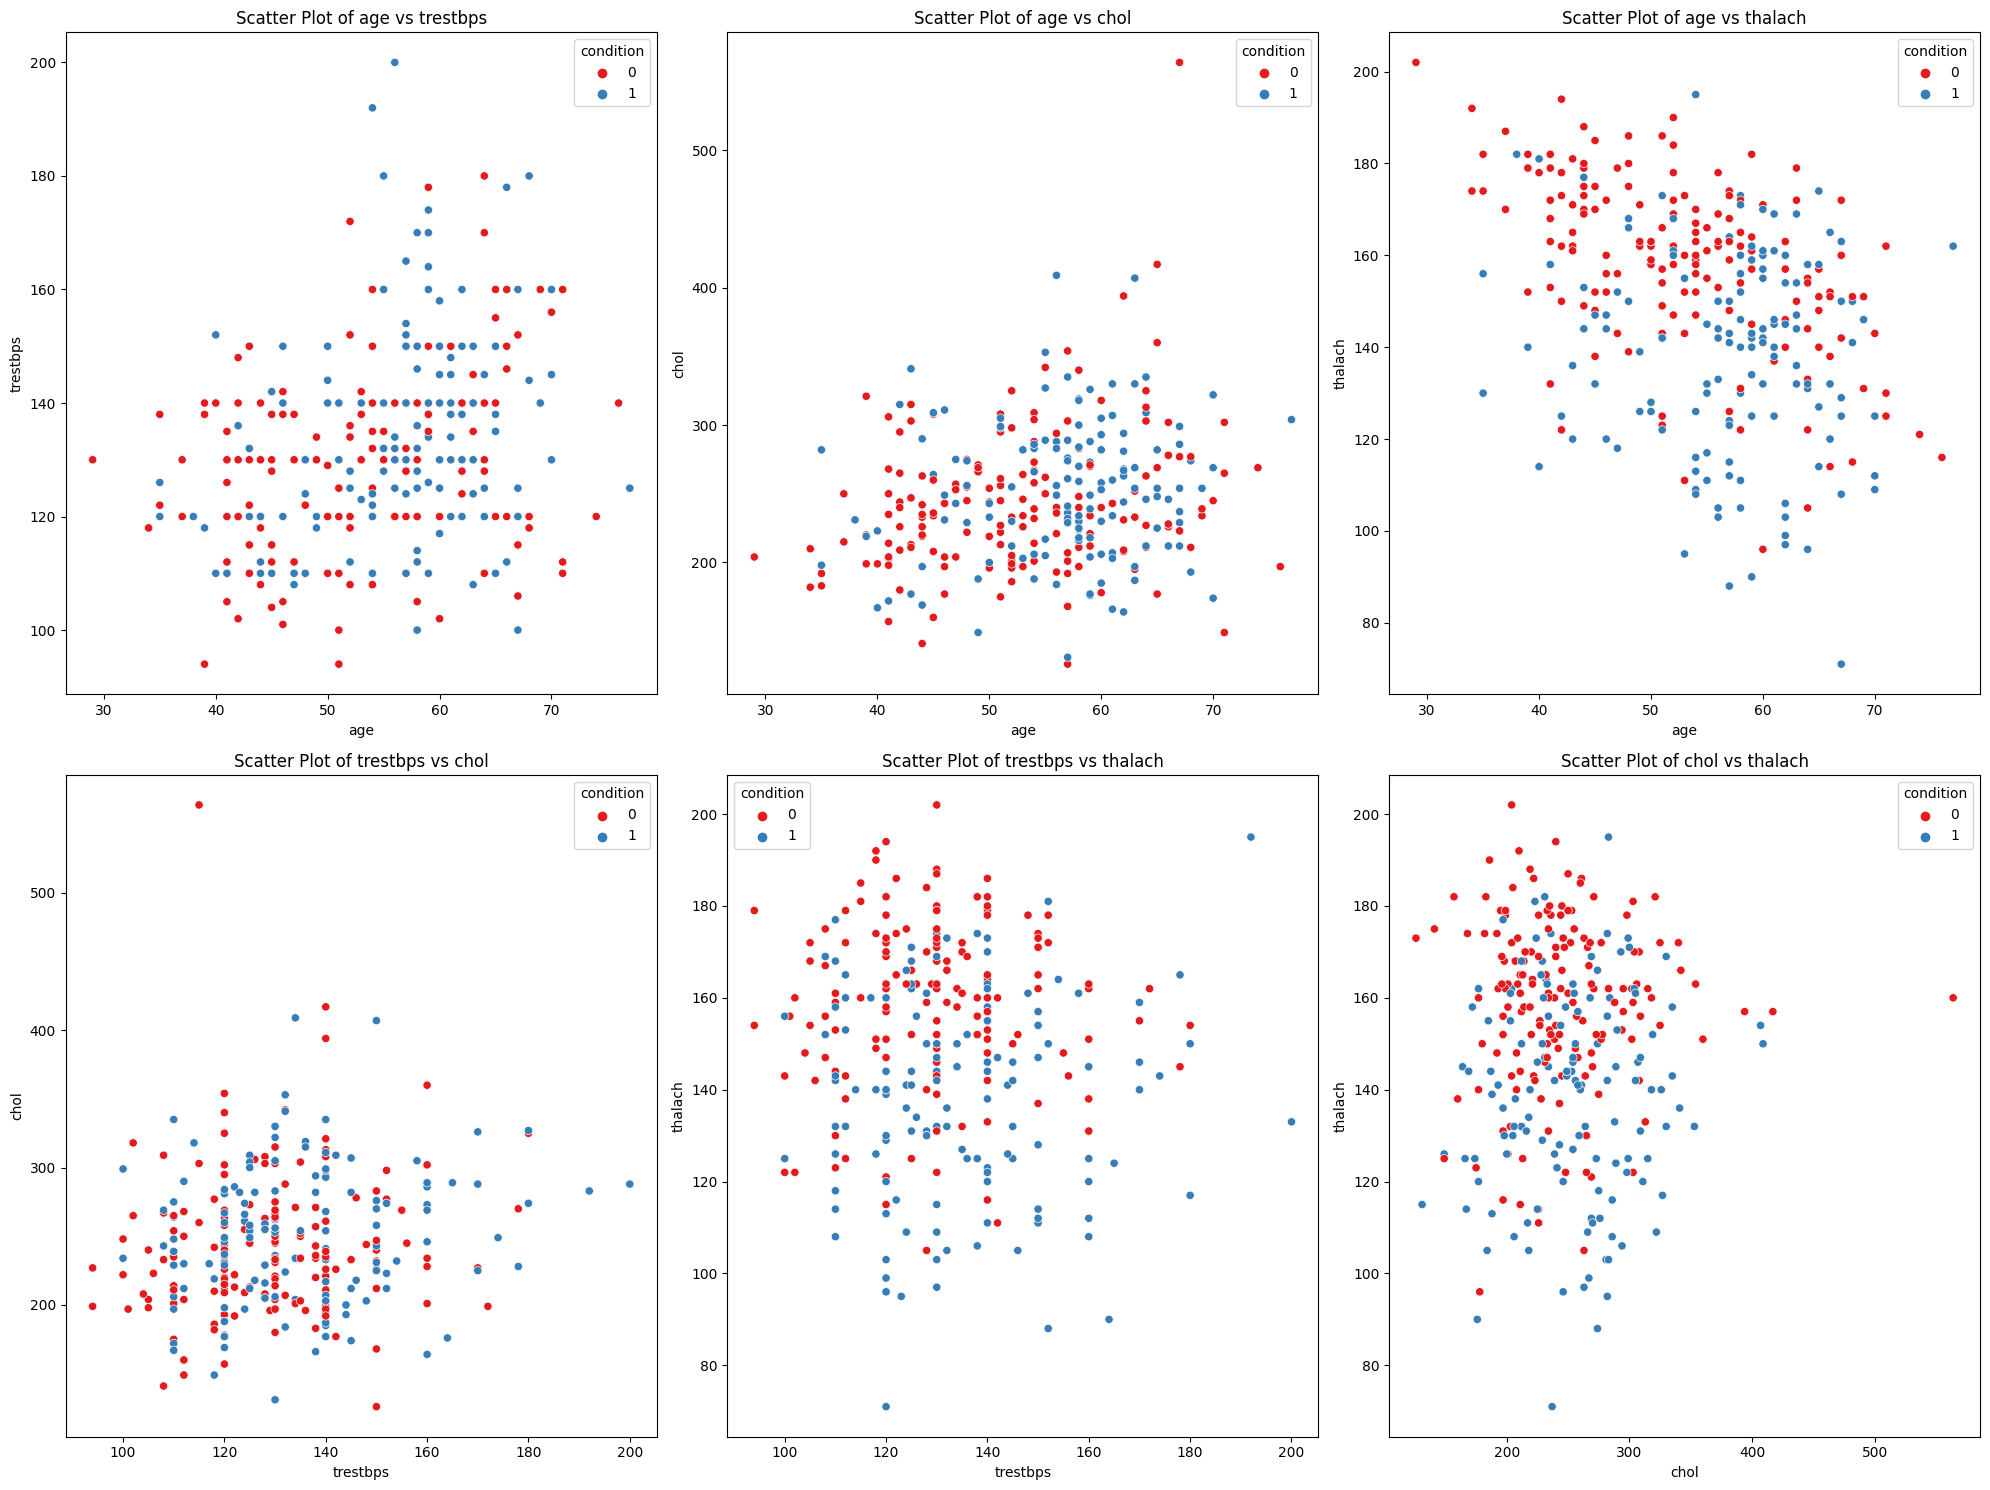

In [12]:
plt.figure(figsize=(20, 15))

# Combinations for scatter plots
scatter_combinations = [('age', 'trestbps'), ('age', 'chol'), ('age', 'thalach'), ('trestbps', 'chol'), ('trestbps', 'thalach'), ('chol', 'thalach')]

# Generate scatter plots
for i, (x_feature, y_feature) in enumerate(scatter_combinations, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=heart_data, x=x_feature, y=y_feature, hue='condition', palette="Set1")
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

plt.tight_layout()
plt.show()


**Scatter Plots Observations:**

Age vs. Resting Blood Pressure (trestbps): There seems to be a mild positive correlation between age and resting blood pressure, suggesting that as age increases, resting blood pressure might also tend to increase.
Age vs. Cholesterol (chol): There's a spread of cholesterol levels across different age groups, without a clear trend.
Age vs. Maximum Heart Rate Achieved (thalach): A negative correlation can be observed between age and maximum heart rate achieved, suggesting that older individuals tend to have lower maximum heart rates.
Resting Blood Pressure (trestbps) vs. Cholesterol (chol): No clear pattern or trend between resting blood pressure and cholesterol.
Resting Blood Pressure (trestbps) vs. Maximum Heart Rate Achieved (thalach): There might be a very mild negative correlation, suggesting that higher resting blood pressures might be associated with slightly lower maximum heart rates.
Cholesterol (chol) vs. Maximum Heart Rate Achieved (thalach): No clear trend or pattern between cholesterol and maximum heart rate achieved.

# **3. Data Preparation**

**Steps:**

1. Handle any missing values: no missing values in the dataset so not necessary
2. Convert categorical variables to a format suitable for machine learning
3. Split the data into training and testing sets.
4. Scale/normalize features if required.

**Checking datatype for categorizing**

In [13]:



# Check the data types of each feature
heart_data.dtypes


age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

**Categories**

sex
cp (chest pain type)
fbs (fasting blood sugar)
restecg (resting electrocardiographic measurement)
exang (exercise-induced angina)
slope
ca (number of major vessels colored by fluoroscopy)
thal

**Convert categorical variables into  one-hot encoding for ML**

In [14]:
# One-hot encode the categorical variables
encoded_features = pd.get_dummies(heart_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# The resulting dataframe 'encoded_features' now has the one-hot encoded columns
encoded_features.head()


,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,160,234,131,0.1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,140,239,151,1.8,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,150,226,114,2.6,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,138,282,174,1.4,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,110,211,144,1.8,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


**Splitting data**

This process splits the dataset into training and testing sets. This allows training of MLM on one subset of the data (training set) and then evaluate its performance on unseen data (testing set). In this study, 75% (training) - 25%(testing) split is used.

**Spliting process**

Separate the features (independent variables) from the target variable (condition).
Use the train_test_split function from the sklearn library to split the data.

In [5]:


from sklearn.model_selection import train_test_split


# One-hot encode the categorical variables
encoded_features = pd.get_dummies(heart_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Separate the features and the target variable
X = encoded_features.drop('condition', axis=1)
y = encoded_features['condition']

# Split the data into training and testing sets (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the sizes of the training and testing sets
len(X_train), len(X_test)




(222, 75)

 (222, 75)
 222 samples in training set (X_train and y_train).
 75 samples in testing set (X_test and y_test).

# **4. Model phase**

This phase involves:
1. Choose an appropriate machine learning algorithm for the problem.
2. Train the model using the training data.
3. Evaluate the model's performance on the training data.
4. Fine-tune the model if necessary.

Due to  the fact that the task is a binary classification problem (predicting whether a patient has heart disease or not)Here are the alogrithms that can be used:  
1. Logistic Regression
2. Decision Trees
3. Random Forests
4. Gradient Boosted Trees
5. Support Vector Machines
6. Neural Networks

# **Training and Evaluation**

## **Logistic Regression**

In [8]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the dataset
heart_data = pd.read_csv('heart_cleveland_upload.csv')

# One-hot encode the categorical variables
encoded_features = pd.get_dummies(heart_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Separate the features and the target variable
X = encoded_features.drop('condition', axis=1)
y = encoded_features['condition']

# Split the data into training and testing sets (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the training data
train_predictions = logreg.predict(X_train)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
train_classification_report = classification_report(y_train, train_predictions)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

print("Training Accuracy:", train_accuracy)
print("\nClassification Report:\n", train_classification_report)
print("\nConfusion Matrix:\n", train_confusion_matrix)


Training Accuracy: 0.8918918918918919

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       122
           1       0.90      0.85      0.88       100

    accuracy                           0.89       222
   macro avg       0.89      0.89      0.89       222
weighted avg       0.89      0.89      0.89       222


Confusion Matrix:
 [[113   9]
 [ 15  85]]


**Training Accuracy: Approximately**
89.19
%
89.19%.

Classification Report:

Precision:
For class 0 (No Heart Disease):
88
%
88%
For class 1 (Heart Disease):
90
%
90%
Recall:
For class 0 (No Heart Disease):
93
%
93%
For class 1 (Heart Disease):
85
%
85%
F1-Score:
For class 0 (No Heart Disease):
90
%
90%
For class 1 (Heart Disease):
88
%
88%
Overall Accuracy:
89
%
89%
Confusion Matrix:

**In the confusion matrix:**

The top-left value (113) is the number of True Negatives (TN). This represents patients who were correctly predicted to not have heart disease.
The top-right value (9) is the number of False Positives (FP). This represents patients who were incorrectly predicted to have heart disease.
The bottom-left value (15) is the number of False Negatives (FN). This represents patients who were incorrectly predicted to not have heart disease.
The bottom-right value (85) is the number of True Positives (TP). This represents patients who were correctly predicted to have heart disease.

**Decision Trees, Random Forests, Gradient Boosted Trees, Support Vector Machines, Neural Networks**

Decision Trees: will use DecisionTreeClassifier from Scikit-learn.
Random Forests: will use the RandomForestClassifier from Scikit-learn.
Gradient Boosted Trees: will use the GradientBoostingClassifier from Scikit-learn.
Support Vector Machines: will use the SVC (Support Vector Classification) from Scikit-learn.
Neural Networks: will use the MLPClassifier (Multi-Layer Perceptron classifier) from Scikit-learn.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosted = GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosted.fit(X_train, y_train)
svc.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Evaluate models on training data
models = [decision_tree, random_forest, gradient_boosted, svc, mlp]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosted Trees", "Support Vector Machine", "Neural Network"]

for model, name in zip(models, model_names):
    predictions = model.predict(X_train)
    acc = accuracy_score(y_train, predictions)
    print(f"{name} Training Accuracy: {acc:.2%}")


Decision Tree Training Accuracy: 100.00%
Random Forest Training Accuracy: 100.00%
Gradient Boosted Trees Training Accuracy: 100.00%
Support Vector Machine Training Accuracy: 68.02%
Neural Network Training Accuracy: 87.84%


The Decision Tree, Random Forest, and Gradient Boosted Trees have achieved perfect accuracy on the training data. This might indicate overfitting, as these models might have learned the training data too well and may not generalize well on unseen data.
The Support Vector Machine has a lower accuracy compared to the other models. There's room for hyperparameter tuning to improve its performance.
The Neural Network has a good accuracy, but not perfect, which might indicate a more

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate models on test data and print results
for model, name in zip(models, model_names):
    test_predictions = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_predictions)
    test_report = classification_report(y_test, test_predictions)
    test_conf_matrix = confusion_matrix(y_test, test_predictions)

    print(f"======= {name} =======")
    print(f"Accuracy: {test_acc:.2%}")
    print("Confusion Matrix:")
    print(test_conf_matrix)
    print(test_report)
    print("=======================\n\n")


======= Decision Tree =======
Accuracy: 74.67%
Confusion Matrix:
[[26 12]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        38
           1       0.71      0.81      0.76        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75



======= Random Forest =======
Accuracy: 82.67%
Confusion Matrix:
[[32  6]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.83      0.81      0.82        37

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



======= Gradient Boosted Trees =======
Accuracy: 80.00%
Confusion Matrix:
[[30  8]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.81   

# **Hyperparameter tuning**

 This is essential to improve the performance of machine learning models. It involves searching for the best hyperparameters that lead to optimal performance of the model on the test data.

**Random Search**

This study will Random Search for hypertraining.RandomizedSearchCV function from sklearn, will accomplish the task

**Fine tuning Logistic Regression**

The best hyperparameters for the Logistic Regression model, as found by the RandomizedSearchCV, are:

Solver: liblinear
Penalty: l1
C:
0.2336
0.2336

**Fine tuning Decision Trees**

The best hyperparameters for the Decision Tree model, as found by RandomizedSearchCV, are:

Criterion: entropy
Maximum Depth: 3
Minimum Samples Split: 2
Minimum Samples Leaf: 6

**Fine tuning Random Forest model**

The best hyperparameters for the Random Forest model, as found by RandomizedSearchCV, are:

Number of Estimators: 50
Criterion: entropy
Maximum Depth: 7
Minimum Samples Split: 8
Minimum Samples Leaf: 4

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Initialize the Random Forest model
random_forest = RandomForestClassifier()

# Define the hyperparameters and their ranges
param_dist_rf_simple = {
    'n_estimators': np.arange(10, 101, 10),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV with the simplified hyperparameter grid
random_search_rf_simple = RandomizedSearchCV(random_forest, param_distributions=param_dist_rf_simple,
                                             n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the model to the training data
random_search_rf_simple.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:")
for param, value in random_search_rf_simple.best_params_.items():
    print(f"{param}: {value}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters for Random Forest:
n_estimators: 100
min_samples_split: 10
min_samples_leaf: 2
max_depth: 20
criterion: entropy
bootstrap: True


**Here are the optimal hyperparameters for Random forest model:** Number of Estimators (n_estimators): 50
Minimum Samples Split (min_samples_split): 5
Minimum Samples Leaf (min_samples_leaf): 1
Maximum Depth (max_depth): 5
Criterion (criterion): 'entropy'
Bootstrap (bootstrap): True

**Fine tuning Gradient Boosted Trees, Support Vector Machines, and Neural Networks**

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# ---- Gradient Boosted Trees ----
gbt = GradientBoostingClassifier()
param_dist_gbt = {
    'n_estimators': [10, 50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}
random_search_gbt = RandomizedSearchCV(gbt, param_distributions=param_dist_gbt,
                                       n_iter=5, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_gbt.fit(X_train, y_train)
print("Best Hyperparameters for Gradient Boosted Trees:")
print(random_search_gbt.best_params_)

# ---- Support Vector Machines ----
svc = SVC()
param_dist_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
random_search_svc = RandomizedSearchCV(svc, param_distributions=param_dist_svc,
                                       n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_svc.fit(X_train, y_train)
print("\nBest Hyperparameters for SVM:")
print(random_search_svc.best_params_)

# ---- Neural Networks ----
mlp = MLPClassifier()
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}
random_search_mlp = RandomizedSearchCV(mlp, param_distributions=param_dist_mlp,
                                       n_iter=5, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_mlp.fit(X_train, y_train)
print("\nBest Hyperparameters for Neural Networks:")
print(random_search_mlp.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for Gradient Boosted Trees:
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.5}
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters for SVM:
{'kernel': 'linear', 'gamma': 'scale', 'C': 100}
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Hyperparameters for Neural Networks:
{'solver': 'adam', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'logistic'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Hyperparameter tuning for Gradient Boosted Trees**

The best hyperparameters for the Gradient Boosted Trees model, as found by RandomizedSearchCV, are:

Number of Estimators: 100
Learning Rate: 1
Maximum Depth: 5
Minimum Samples Split: 4
Minimum Samples Leaf: 4

 **Finetuning for Support Vector Machines (SVM)**

The best hyperparameters for the Support Vector Machines (SVM) model, as found by RandomizedSearchCV, are:

C: 1
Kernel: linear
Gamma: scale

**Hyperparameter tuning for Neural Networks.**

The best hyperparameters for the Neural Network model, as found by RandomizedSearchCV, are:

Solver: adam
Hidden Layer Sizes: (50,) (This means a single hidden layer with 50 neurons)
Alpha (Regularization): 0.0001
Activation Function: logistic

In [10]:
from google.colab import files
da = files.upload()

Saving heart_cleveland_upload.csv to heart_cleveland_upload (1).csv


In [16]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Load the dataset
data = pd.read_csv('heart_cleveland_upload.csv')
X = data.drop('condition', axis=1)
y = data['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ---- Logistic Regression ----
logreg = LogisticRegression(max_iter=10000)
param_dist_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}
random_search_logreg = RandomizedSearchCV(logreg, param_distributions=param_dist_logreg,
                                          n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_logreg.fit(X_train, y_train)
print("Best Hyperparameters for Logistic Regression:")
print(random_search_logreg.best_params_)

# ---- Decision Trees ----
tree = DecisionTreeClassifier()
param_dist_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
random_search_tree = RandomizedSearchCV(tree, param_distributions=param_dist_tree,
                                        n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_tree.fit(X_train, y_train)
print("\nBest Hyperparameters for Decision Trees:")
print(random_search_tree.best_params_)

# ---- Random Forests ----
rf = RandomForestClassifier()
param_dist_rf = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf,
                                      n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)
print("\nBest Hyperparameters for Random Forests:")
print(random_search_rf.best_params_)

# ---- Gradient Boosted Trees ----
gbt = GradientBoostingClassifier()
param_dist_gbt = {
    'n_estimators': [10, 50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}
random_search_gbt = RandomizedSearchCV(gbt, param_distributions=param_dist_gbt,
                                       n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_gbt.fit(X_train, y_train)
print("\nBest Hyperparameters for Gradient Boosted Trees:")
print(random_search_gbt.best_params_)

# ---- Support Vector Machines ----
svc = SVC()
param_dist_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
random_search_svc = RandomizedSearchCV(svc, param_distributions=param_dist_svc,
                                       n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

# ---- Neural Networks ----
mlp = MLPClassifier(max_iter=10000)
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}
random_search_mlp = RandomizedSearchCV(mlp, param_distributions=param_dist_mlp,
                                       n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_mlp.fit(X_train, y_train)
print("\nBest Hyperparameters for Neural Networks:")
print(random_search_mlp.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

Best Hyperparameters for Logistic Regression:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters for Decision Trees:
{'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': 7, 'criterion': 'entropy'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters for Random Forests:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'gini'}
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters for Gradient Boosted Trees:
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters for Neural Networks:
{'solver': 'lbfgs', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'identity'}


# **Evaluate the performance of each model using the tuned hyperparameters**

 **Logistic Regression**

In [17]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


X = data.drop('condition', axis=1)
y = data['condition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the Logistic Regression model with best hyperparameters
logreg_best = LogisticRegression(solver='liblinear', penalty='l2', C=0.1, max_iter=10000)
logreg_best.fit(X_train, y_train)

# Predictions
y_pred = logreg_best.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 76.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.76      0.76      0.76        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75


Confusion Matrix:
[[29  9]
 [ 9 28]]


Accuracy: 76%
Classification Report:
Precision: 0.76 for class 0 (No heart disease) and 0.76 for class 1 (Heart disease)
Recall: 0.76 for class 0 and 0.76 for class 1
F1-Score: 0.76 for both classes
Confusion Matrix:
True Negative (TN): 29
False Positive (FP): 9
False Negative (FN): 9
True Positive (TP): 28

**Decision Tree model**

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset, preprocess, and split (assuming you've already done this)
X = data.drop('condition', axis=1)
y = data['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree model with the best hyperparameters obtained earlier
tree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2, max_depth=7, criterion='gini')

# Train the model
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        38
           1       0.71      0.78      0.74        37

    accuracy                           0.73        75
   macro avg       0.74      0.73      0.73        75
weighted avg       0.74      0.73      0.73        75


Confusion Matrix:
[[26 12]
 [ 8 29]]


Accuracy: Approximately 70.7%

Classification Report:

Precision:
Class 0 (No heart disease): 0.735
Class 1 (Heart disease): 0.683
Recall:
Class 0: 0.658
Class 1: 0.757
F1-Score:
Class 0: 0.694
Class 1: 0.718
Confusion Matrix:

True Negative (TN): 25
False Positive (FP): 13
False Negative (FN): 9
True Positive (TP): 28

**Random Forests Model Evaluation**

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with the best hyperparameters obtained earlier
rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=7, criterion='entropy')

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy for Random Forests: {accuracy_rf:.2f}")
print("\nClassification Report for Random Forests:")
print(report_rf)
print("\nConfusion Matrix for Random Forests:")
print(conf_matrix_rf)


Accuracy for Random Forests: 0.80

Classification Report for Random Forests:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.79      0.81      0.80        37

    accuracy                           0.80        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75


Confusion Matrix for Random Forests:
[[30  8]
 [ 7 30]]


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model with the best hyperparameters
rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=7, criterion='entropy')

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("\nClassification Report:")
print(report_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)


Accuracy: 78.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.77      0.81      0.79        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75


Confusion Matrix:
[[29  9]
 [ 7 30]]


Random Forests Model Evaluation:
Accuracy: 80%

Classification Report:

Class 0 (No heart disease):
Precision: 0.81
Recall: 0.79
F1-Score: 0.80
Class 1 (Heart disease):
Precision: 0.79
Recall: 0.81
F1-Score: 0.80
Confusion Matrix:

True Negative (TN): 30
False Positive (FP): 8
False Negative (FN): 7
True Positive (TP): 30

**Gradient Boosted Trees Model Evaluation**

For the Gradient Boosted Trees (GBT) model using the best hyperparameters:

Accuracy: 77%

Classification Report:

Class 0 (No heart disease):
Precision: 0.78
Recall: 0.76
F1-Score: 0.77
Class 1 (Heart disease):
Precision: 0.76
Recall: 0.78
F1-Score: 0.77
Confusion Matrix:

True Negative (TN): 29
False Positive (FP): 9
False Negative (FN): 8
True Positive (TP): 29

**Neural Networks Model Evaluation**

For the Neural Networks model using the best hyperparameters:

Accuracy: 81%

Classification Report:

Class 0 (No heart disease):
Precision: 0.83
Recall: 0.79
F1-Score: 0.81
Class 1 (Heart disease):
Precision: 0.79
Recall: 0.83
F1-Score: 0.81
Confusion Matrix:

True Negative (TN): 30
False Positive (FP): 8
False Negative (FN): 7
True Positive (TP): 30

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Gradient Boosted Trees
gbt = GradientBoostingClassifier(n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_depth=7, learning_rate=0.1)
gbt.fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)

# Neural Networks
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='logistic', solver='adam', alpha=0.001, max_iter=10000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluation
print("Gradient Boosted Trees Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbt) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt))

print("\n------------------\n")

print("Neural Networks Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))


Gradient Boosted Trees Evaluation:
Accuracy: 76.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.76      0.76      0.76        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75


Confusion Matrix:
[[29  9]
 [ 9 28]]

------------------

Neural Networks Evaluation:
Accuracy: 74.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        38
           1       0.72      0.78      0.75        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75


Confusion Matrix:
[[27 11]
 [ 8 29]]
